# Remapping an image using arbitrary transformation

In this recipe, you will learn how to transform images using per-pixel mappings. This is a piece of functionality that is very generic and is used in many computer vision applications, such as image stitching, camera frames undistortion, and many others.

Generic per-pixel transformation is implemented by the `cv2.remap` function. It accepts a source image and two maps (which can be passed as one map with two channels), and returns a transformed image. The function also accepts parameters specifying how pixel value interpolation and extrapolation must be performed. In our case, we specify bilinear interpolation, and out-of-range values are replaced with the closest (spatially) in-range pixel values. The function is very generic and often used as a building block of many computer vision applications. 

In [1]:
# Import all of the necessary modules
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

%matplotlib auto
%pylab inline

def print_image(header,name,np_arr,
                start_First=0,end_First=1,start_Second=0,end_Second=2,start_3=0,end_3=5):
    print("------  {0:-<25}    Shape{1} {2}: {3:}".format(header, np_arr.shape, name, str(np_arr.dtype)) )
    shapes = np_arr.shape #print(shapes)
    if shapes[0] < end_First:
        end_First = shapes[0]
    if shapes[1] < end_Second:
        end_Second = shapes[1]
    if len(shapes)==3:
        if shapes[2] < end_3:
            end_3 = shapes[2]
    if len(shapes)==3:
        for i in range (start_First,end_First):
            print("[", sep='',end="")
            for j in range (start_Second,end_Second):
                print(np_arr[i,j,start_3:end_3], sep=' ', end=" ")
            print(']')
    if len(shapes)==2:
        for i in range (start_First,end_First):
            print("[", end=" ")
            #print(np_arr[i,start_Second:end_Second],sep=' ',end=" ") cutoff sting by<60
            for k in range (start_Second,end_Second):
                print(np_arr[i,k], end=" ")
            print(']')

def draw_grid(img, pxystep=None,major_color=None, pxstep=None,pystep=None):
    #print("{0} XY{1} color{2} X{3} Y{4}".format(img.shape, pxystep,major_color,pxstep,pystep))
    pXYstep = None; pXstep=None; pYstep=None; 
    major_Color=None; minor_Color=None; major_Alpha=None; minor_Alpha=None;
    if pxystep != None:
        pXYstep = pXstep  = pYstep  = pxystep;
    else:
        pXstep = pxstep if pxstep != None else 100
        pYstep = pystep if pystep != None else 100
    #print("pXstep", pXstep, "pYstep", pYstep)
    major_Color = major_color if major_color != None else (204, 204, 204) #'#CCCCCC'
    if pXstep != None:
        x = pXstep
        #Draw all lines on X
        while x < img.shape[1]:
            cv2.line(img, (x, 0), (x, img.shape[0]), color=major_Color, thickness=1)
            x += pXstep
    if pYstep != None:
        y = pYstep
        #Draw all lines on Y
        while y < img.shape[0]:
            cv2.line(img, (0, y), (img.shape[1], y), color=major_Color,thickness=1)
            y += pYstep
    return img

def plt_view_image(plt,list_images,figsize=(15,6), axis="off", cmap='gray'):
    plt.figure(figsize=figsize)
    n = len(list_images)  #; print(n)
    plot_number = 1
    for name, img in list_images:
        plt.subplot(1,n,plot_number)
        plt.axis(axis); plt.title(name)
        if cmap =='gray': plt.imshow(img,cmap='gray' )
        else: plt.imshow(img)
        plot_number = plot_number + 1
    plt.show()

def plt_view_grid(plt, axis ='off',
                  xy_sizeaxis =None,
                  xy_measuare =None,
                  x_min=-10, x_max=10, y_min=-10, y_max=10,
                  x_major_size=1, x_minor_size=0.2, y_major_size=1, y_minor_size=0.2,
                  major_color='#CCCCCC', major_alpha=0.5,
                  minor_color='#CCCCCC', minor_alpha=0.2
                 ):
    if xy_sizeaxis is None:  x_min=-10; x_max=10; y_min=-10; y_max=10;
    else: x_min, x_max, y_min, y_max = xy_sizeaxis

    if xy_measuare is None:  x_major_size=1; x_minor_size=0.2; y_major_size=1; y_minor_size=0.2;
    else: x_major_size, x_minor_size, y_major_size, y_minor_size = xy_measuare
        
    plt.xlim(x_min, x_max); plt.ylim(y_min, y_max);
    ax = plt.gca()
    x_major_ticks=np.arange(x_min,x_max,x_major_size); x_minor_ticks=np.arange(x_min,x_max,x_minor_size)
    y_major_ticks=np.arange(y_min,y_max,y_major_size); y_minor_ticks=np.arange(y_min,y_max,y_minor_size)
    ax.set_xticks(x_major_ticks)
    ax.xaxis.set_major_locator(MultipleLocator(x_major_size))
    ax.set_xticks(x_minor_ticks, minor=True)
    ax.set_yticks(y_major_ticks)
    ax.yaxis.set_major_locator(MultipleLocator(y_major_size))
    ax.set_yticks(y_minor_ticks, minor=True)
    plt.grid(which='major', color=major_color, alpha=major_alpha)
    plt.grid(which='minor', color=minor_color, alpha=minor_alpha)
    
#help("modules")   
import sys             
print('\n'.join(sys.path))
print("current folder ==",os.getcwd())
#pip list

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib
D:\HTML_DOC\Program\opencv\Packt\S08\env
C:\Program Files\Python38\python38.zip
C:\Program Files\Python38\DLLs
C:\Program Files\Python38\lib
C:\Program Files\Python38
d:\html_doc\program\opencv\packt\s08\env

d:\html_doc\program\opencv\packt\s08\env\lib\site-packages
d:\html_doc\program\opencv\packt\s08\env\lib\site-packages\pip-20.1b1-py3.8.egg
d:\html_doc\program\opencv\packt\s08\env\lib\site-packages\win32
d:\html_doc\program\opencv\packt\s08\env\lib\site-packages\win32\lib
d:\html_doc\program\opencv\packt\s08\env\lib\site-packages\Pythonwin
d:\html_doc\program\opencv\packt\s08\env\lib\site-packages\IPython\extensions
C:\Users\polit\.ipython
current folder == D:\HTML_DOC\Program\opencv\Packt\S08\env


------  data/Lena.png------------    Shape(512, 512, 3) image_orig: uint8
[[125 137 226] [125 137 226] [133 137 223] [128 136 223] [120 138 226] [116 129 226] [123 138 228] ]
[[125 137 226] [125 137 226] [133 137 223] [128 136 223] [120 138 226] [116 129 226] [123 138 228] ]
[[125 137 226] [125 137 226] [133 137 223] [128 136 223] [120 138 226] [116 129 226] [123 138 228] ]
[[125 137 226] [125 137 226] [133 137 223] [128 136 223] [120 138 226] [116 129 226] [123 138 228] ]
[[125 137 226] [125 137 226] [133 137 223] [128 136 223] [120 138 226] [116 129 226] [123 138 228] ]


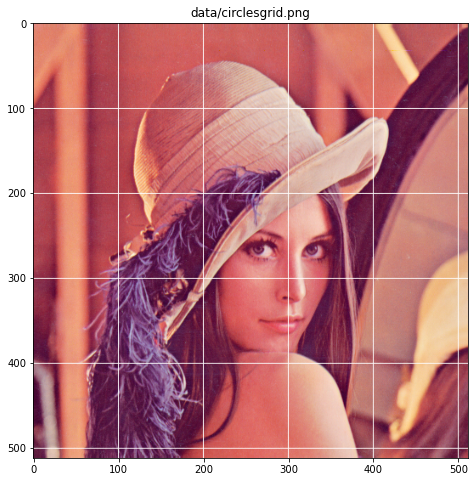

In [2]:
image_orig = cv2.imread('../data/Lena.png')



##############################################
print_image('data/Lena.png','image_orig',image_orig,0,5,0,7)
plt_view_image(plt,[["data/circlesgrid.png", draw_grid(np.copy(image_orig),100,(255,255,255))[:,:,[2,1,0]]]],
               figsize=(16,8), axis='on', cmap='gray')

### Prepare the per-pixel transformation maps:

In [3]:
xmap = np.zeros((image_orig.shape[1], image_orig.shape[0]), np.float32)
ymap = np.zeros((image_orig.shape[1], image_orig.shape[0]), np.float32)



##################################################
print_image('xmap','xmap',xmap,0,5,0,7)
print_image('ymap','ymap',ymap,0,5,0,7)

------  xmap---------------------    Shape(512, 512) xmap: float32
[ 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ]
[ 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ]
[ 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ]
[ 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ]
[ 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ]
------  ymap---------------------    Shape(512, 512) ymap: float32
[ 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ]
[ 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ]
[ 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ]
[ 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ]
[ 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ]


In [4]:
for y in range(image_orig.shape[0]):
    for x in range(image_orig.shape[1]):
        xmap[y,x] = x + 30 * math.cos(20 * x / image_orig.shape[0])
        ymap[y,x] = y + 30 * math.sin(20 * y / image_orig.shape[1])
        
        
##################################################
print_image('xmap','xmap',xmap,0,5,0,7)
print_image('ymap','ymap',ymap,0,5,0,7)

------  xmap---------------------    Shape(512, 512) xmap: float32
[ 30.0 30.977116 31.908493 32.794243 33.634533 34.42961 35.17979 ]
[ 30.0 30.977116 31.908493 32.794243 33.634533 34.42961 35.17979 ]
[ 30.0 30.977116 31.908493 32.794243 33.634533 34.42961 35.17979 ]
[ 30.0 30.977116 31.908493 32.794243 33.634533 34.42961 35.17979 ]
[ 30.0 30.977116 31.908493 32.794243 33.634533 34.42961 35.17979 ]
------  ymap---------------------    Shape(512, 512) ymap: float32
[ 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ]
[ 2.171577 2.171577 2.171577 2.171577 2.171577 2.171577 2.171577 ]
[ 4.341367 4.341367 4.341367 4.341367 4.341367 4.341367 4.341367 ]
[ 6.507584 6.507584 6.507584 6.507584 6.507584 6.507584 6.507584 ]
[ 8.668449 8.668449 8.668449 8.668449 8.668449 8.668449 8.668449 ]


### Remap the source image:

------  data/Lena.png------------    Shape(512, 512, 3) image_orig: uint8
[[125 137 226] [125 137 226] [133 137 223] [128 136 223] [120 138 226] [116 129 226] [123 138 228] ]
[[125 137 226] [125 137 226] [133 137 223] [128 136 223] [120 138 226] [116 129 226] [123 138 228] ]
[[125 137 226] [125 137 226] [133 137 223] [128 136 223] [120 138 226] [116 129 226] [123 138 228] ]
[[125 137 226] [125 137 226] [133 137 223] [128 136 223] [120 138 226] [116 129 226] [123 138 228] ]
[[125 137 226] [125 137 226] [133 137 223] [128 136 223] [120 138 226] [116 129 226] [123 138 228] ]
------  remapped_img-------------    Shape(512, 512, 3) remapped_img: uint8
[[121 127 220] [109 131 223] [104 127 225] [108 132 223] [107 130 225] [113 131 225] [120 135 223] ]
[[121 127 220] [109 131 223] [104 127 225] [108 132 223] [107 130 225] [113 131 225] [120 135 223] ]
[[114 128 221] [109 132 223] [105 130 224] [109 131 223] [108 129 224] [110 129 223] [114 132 222] ]
[[104 128 221] [110 132 224] [108 133 223]

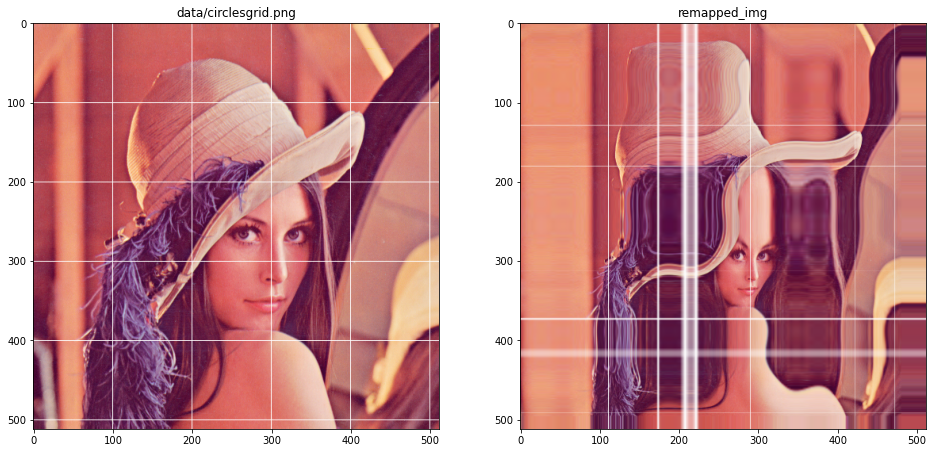

In [5]:
remapped_img = cv2.remap(draw_grid(np.copy(image_orig),100,(255,255,255)), 
                         xmap, ymap, cv2.INTER_LINEAR, None, cv2.BORDER_REPLICATE)




##################################################
print_image('data/Lena.png','image_orig',image_orig,0,5,0,7)
print_image('remapped_img','remapped_img',remapped_img,0,5,0,7)
plt_view_image(plt,[["data/circlesgrid.png", draw_grid(np.copy(image_orig),100,(255,255,255))[:,:,[2,1,0]]],
                    ["remapped_img", remapped_img[:,:,[2,1,0]]]
                   ],
               figsize=(16,8), axis='on', cmap='gray')